# Proyecto 03 - Sistemas de Recomendación

Trabajo realizado por Carlos Rodriguez carlosd2.rodriguez@gmail.com https://github.com/carlosrosan/ACAMICA

## Dataset: STEAM

**Origen del dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

#### Objetivo: desarrollar un modelo de Filtro Colaborativo para un sistema de recomendación de juegos

**Empezaremos por importar el dataset con las Reviews de los juegos**

In [2]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 7
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

data_reviews = pd.DataFrame(data_reviews)
data_reviews.head(3)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Sneaky_Panda,0.6,243.0,725280,3,2017-11-27,If you take a discount - it's not a bad horror...,False,1,NaN,NaN,NaN
2,Coby,8.9,227.0,35140,3,2018-01-03,Finished the game around 6 hours. Thats only t...,False,1,NaN,NaN,NaN


**Ahora, importaremos el dataset que describe a los Juegos de forma individual**

In [3]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [4]:
data_reviews.isna().sum()

username              0
hours              3817
products           2228
product_id            0
page_order            0
date                  0
text                  0
early_access          0
page                  0
user_id          660348
found_funny      942194
compensation    1092435
dtype: int64

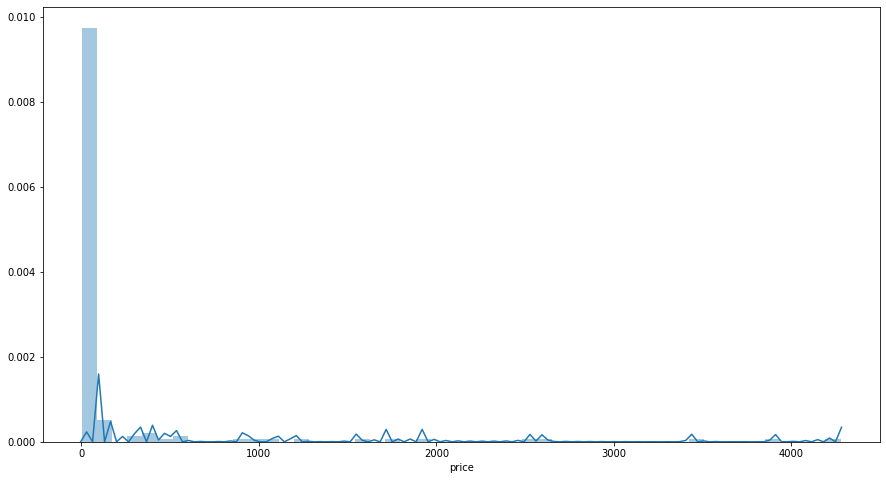

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,8))
sns.distplot(data_games.price.value_counts())

#### Haremos un match de los 100 juegos con mas reviews del dataset, tal que tengan mas de 5 horas acumuladas de uso del juego por usuario

In [8]:
import time

match = pd.DataFrame(columns=['publisher','genres','app_name','title','total_hours_played','url','release_date','tags','discount_price','reviews_url','specs','price','early_access','id','developer','sentiment','metascore']  )
#for i in range(1,len(data_reviews)):
for i in range(0,100):
    print(i, end="\r")
    time.sleep(0.1)
    match_id=data_reviews[data_reviews.hours > 5].product_id.value_counts().index[i]
    match=match.append(data_games[data_games.id==match_id])
    match['total_hours_played'].iloc[i]=data_reviews[data_reviews.product_id == str(match_id)].product_id.astype(int).sum()

match.head(3)

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89


### ¿Cuántos usuarios únicos hay?

In [9]:
len(data_reviews.user_id)

1113296

### ¿Cuántos juegos calificó cada usuario?

In [10]:
data_reviews.username.value_counts()

123                        304
Alex                       249
Nick                       218
Chris                      189
..                         182
                          ... 
theHUTT ]|[ Jabba            1
Franz Raziel                 1
Gauqmebulia Gauqmebulia      1
japanen                      1
Huniper                      1
Name: username, Length: 713170, dtype: int64

### ¿cuáles son los juegos más populares?¿Y los menos populares?

In [11]:
# Los 10 más populares
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts().index[i])].title.values)

['Team Fortress 2']
['Rust']
['Borderlands 2']
['Fallout 4']
['Grand Theft Auto V']
['Undertale']
['Portal 2']
['DayZ']
['Warframe']


In [12]:
# Los 10 menos populares
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts(ascending=True).index[i])].title.values)

['Solitaire - Cat Pirate Portrait']
['Wildilfe Park 3 - Dino Invasion']
['Grand Academy for Future Villains']
['Drunk-Fu: Wasted Masters']
['AGON - The Mysterious Codex (Trilogy)']
['NEON GALAXY']
['Solar System']
['PCMark 10']
['ReThink | Evolved']


#### Eliminaremos los valores faltantes de user_id, product_id y metascore, debido a que sin ellos no podremos entrenar el modelo. No los sustituiremos ya que contamos con suficiente información como para que los faltantes no afecten.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ¿Cuantos valores faltantes realmente existen en los features product_id, user_id y metascore?

In [14]:
data_reviews.product_id.isna().sum()

0

In [15]:
data_reviews.user_id.isna().sum()

660348

In [16]:
data_reviews.product_id = data_reviews.product_id.replace(['NA'],np.nan)
data_reviews = data_reviews[~data_reviews.product_id.isna()]
data_reviews = data_reviews[~data_reviews.user_id.isna()]
data_reviews.shape

(452948, 12)

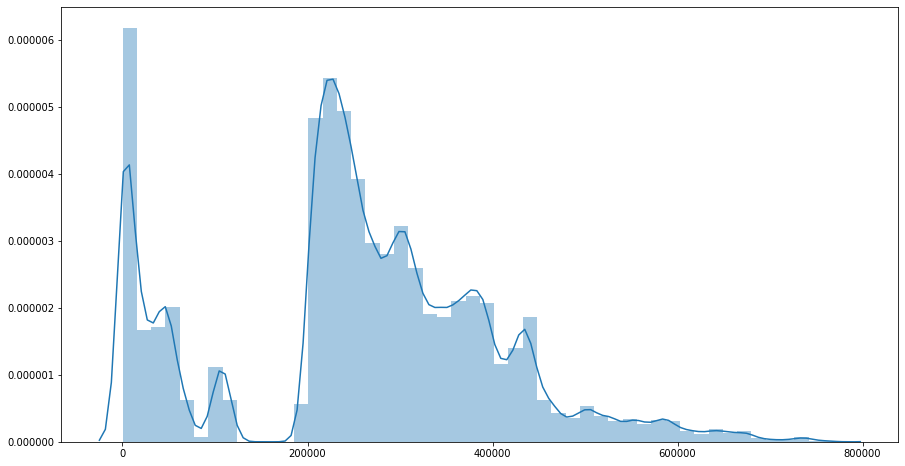

In [17]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.product_id.astype(int).values)

### ¿Cómo es la distribución de las calificaciones y horas jugadas?

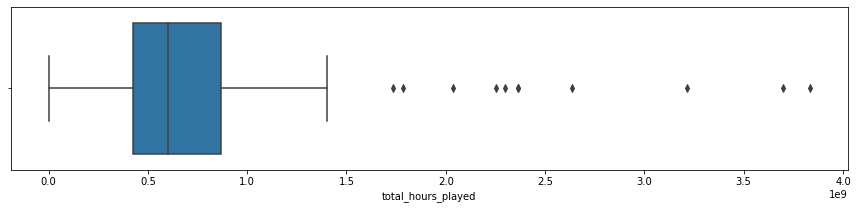

In [18]:
# Gráfico de horas jugadas en el top 100 de juegos (dataset match)

plt.subplots(figsize=(15,3))
#sns.boxplot(x=match['total_hours_played'])
sns.boxplot(x=match['total_hours_played'])

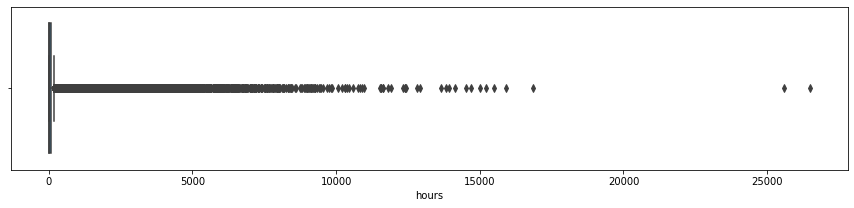

In [19]:
#Gráfico de horas jugadas por usuario por juego

plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

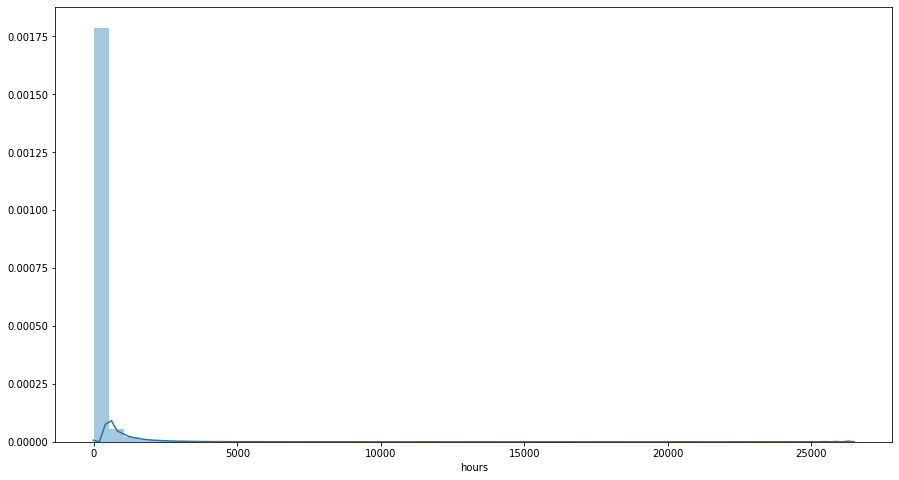

In [20]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews[~data_reviews['hours'].isna()]['hours'])

#### Existen juegos y usuarios con cantidades de horas jugadas que pueden considerarse como outliers, las cuales eliminaremos.

In [21]:
valor_medio = data_reviews['hours'].mean()
std = data_reviews['hours'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(data_reviews['hours'] < minimo, data_reviews['hours'] > maximo)
print(valor_medio, std, minimo, maximo)

121.26549068384124 390.46328053736795 -1050.1243509282624 1292.655332295945


In [22]:
mascara_outliers.value_counts()

False    445375
True       7573
Name: hours, dtype: int64

In [23]:
data_reviews = data_reviews[~mascara_outliers]
data_reviews['hours'].describe()

count    444276.000000
mean         82.877335
std         174.037405
min           0.000000
25%           4.600000
50%          17.900000
75%          68.100000
max        1292.500000
Name: hours, dtype: float64

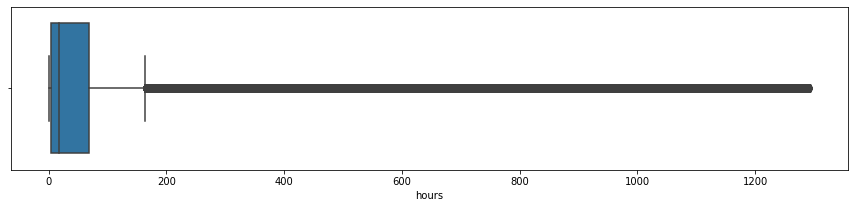

In [24]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

### Filtraremos los juegos jugados por más de 2 usuarios y por mas de 20 horas por usuario

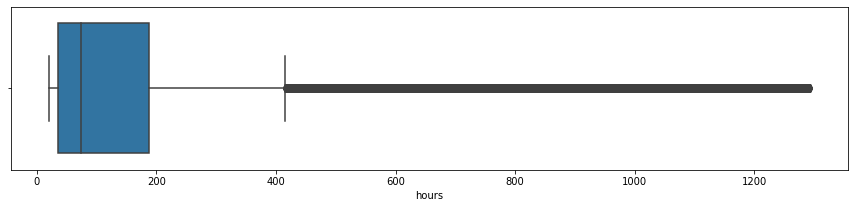

In [25]:
data_reviews = data_reviews[data_reviews['hours'] >= 20]
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

In [26]:
data_reviews.user_id.value_counts()

76561197969749884    93
76561198011965365    23
76561198010131631    16
76561198010800766    15
76561198014906902    12
                     ..
76561198140026324     1
76561198041972384     1
76561198099355425     1
76561197993563519     1
76561198015768380     1
Name: user_id, Length: 186853, dtype: int64

### Eliminaremos los juegos con pocos reviews (menos de 2)

In [27]:
print(data_reviews.shape)
data_reviews = data_reviews.groupby('user_id').filter(lambda x: len(x) >= 2)
data_reviews.user_id.value_counts()
print(data_reviews.shape)

(212142, 12)
(44957, 12)


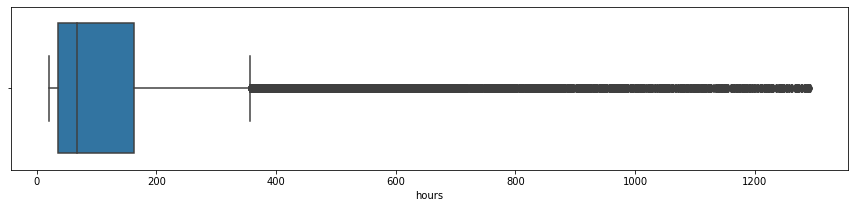

In [28]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

### ¿Cuál es el juego con más reviews?

In [29]:
match.iloc[0]

publisher                                                         Valve
genres                                           [Action, Free to Play]
app_name                                                Team Fortress 2
title                                                   Team Fortress 2
total_hours_played                                             11502040
url                   http://store.steampowered.com/app/440/Team_For...
release_date                                                 2007-10-10
tags                  [Free to Play, Multiplayer, FPS, Action, Shoot...
discount_price                                                      NaN
reviews_url           http://steamcommunity.com/app/440/reviews/?bro...
specs                 [Multi-player, Cross-Platform Multiplayer, Ste...
price                                                      Free to Play
early_access                                                      False
id                                                              

### Ordenamos los juegos por popularidad

In [30]:
match.head()

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89
25017,Bethesda Softworks,[RPG],Fallout 4,Fallout 4,3832322760,http://store.steampowered.com/app/377160/Fallo...,2015-11-09,"[Open World, Post-apocalyptic, Exploration, Si...",NaN,http://steamcommunity.com/app/377160/reviews/?...,"[Single-player, Steam Achievements, Full contr...",29.99,False,377160,Bethesda Game Studios,Mixed,84
26955,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,2299824120,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,271590,Rockstar North,Mixed,96


In [31]:
data_games = data_games.rename(columns={'id':'product_id'})
data_reviews = data_reviews.merge(data_games, on='product_id', how='left')

# Transformaremos los tipos de datos
data_reviews.metascore = data_reviews.metascore.replace(['NA'],np.nan)
data_reviews.metascore = data_reviews.metascore.astype(np.float32)
data_reviews.product_id = data_reviews.product_id.astype(int) 

data_reviews.metascore.value_counts()

84.0    2571
81.0    2122
88.0    1879
89.0    1840
92.0    1715
        ... 
48.0       2
27.0       1
20.0       1
50.0       1
24.0       1
Name: metascore, Length: 61, dtype: int64

In [32]:
# Eliminaremos los valores faltatentes

print(data_reviews.shape)
data_reviews = data_reviews[~data_reviews.metascore.isna()]
print(data_reviews.shape)

(44987, 27)
(31035, 27)


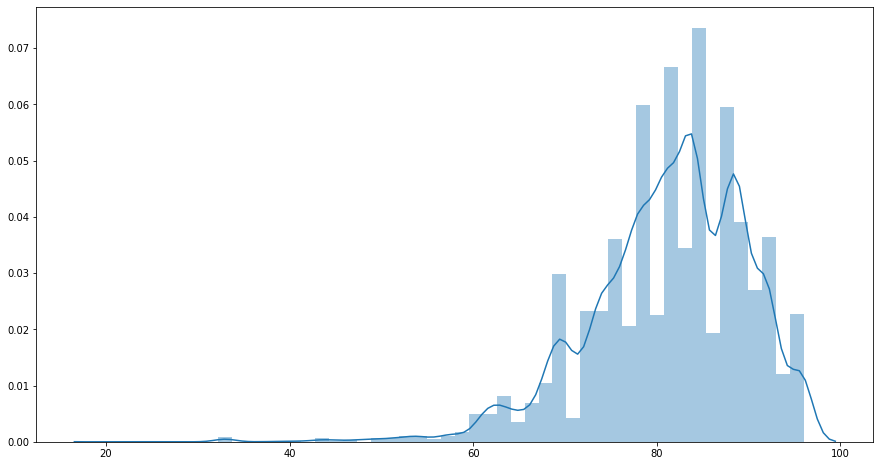

In [33]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

#### Observando el nivel de sesgo en la distribución de metascores, filtraremos nuestro dataset a solo las reviews y juegos con metascore mayor a 55.0

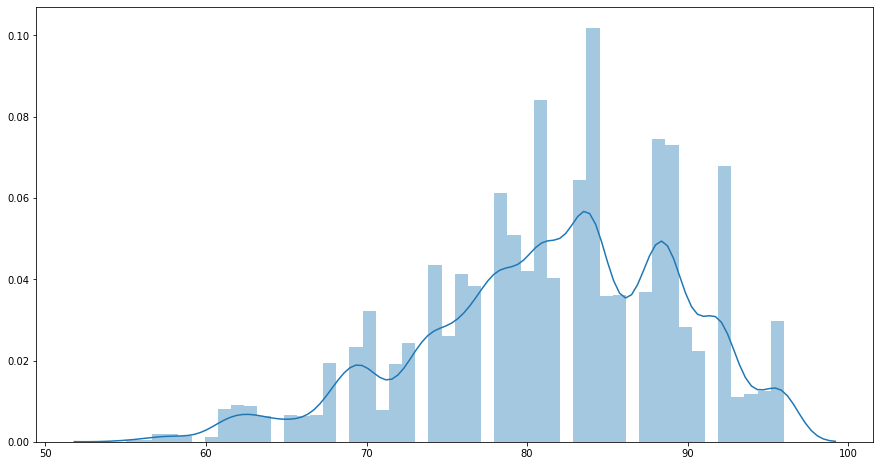

In [34]:
data_reviews = data_reviews[data_reviews.metascore >= 55]
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

In [35]:
data_reviews = data_reviews.drop(columns=['products','page_order','date','text','early_access_x','page','found_funny','compensation','publisher','app_name','url','release_date','tags','discount_price','reviews_url','specs','early_access_y','developer','sentiment'])
data_reviews.head(2)

,username,hours,product_id,user_id,genres,title,price,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,19.99,91.0
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


In [36]:
data_reviews.to_csv('data_reviews 23 12 2020.csv', sep=',')

In [37]:
data_games = data_games[~data_games.product_id.isna()]
data_games.product_id = data_games.product_id.astype(int)

# Entrenamiento de modelos de sistema de recomendación

Para entrenar el sistema de recomendación vamos a usar la biblioteca Surprise. Recomendamos tener abierta la [documentación](https://surprise.readthedocs.io/en/stable/getting_started.html) a medida que van a través de este notebook.

### Eligiremos como target el feature metascore, ya que es proporcional al rating de satisfacción de cada juego

In [38]:
!pip install surprise

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 100))

df1 = data_reviews.copy()
df1 = df1.drop(['metascore','genres','title','title','price'], axis=1)
df1.head(2)

,username,hours,product_id,user_id
0,Kevin Droid,21.6,35140,76561198030870442
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421


In [39]:
data_games_train = data_games.copy()
df1= pd.merge(df1, data_games_train, on='product_id', how='inner')
df1['user_id'] = df1['user_id'].dropna()
df1 = df1[~df1['user_id'].isnull()]
df1 = df1[df1['metascore']!='NA']
df1.head(2)

,username,hours,product_id,user_id,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,Fugitive Mind,20.7,35140,76561198105445916,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [40]:
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']], reader)
data

In [41]:
trainset, testset = train_test_split(data, test_size=.25)
print(trainset)

### Empezaremos por entrenar el primer modelo (SVD) sin parametrizar

In [42]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [43]:
predictions = algo.test(testset)
predictions[0]

Prediction(uid='76561198135446411', iid=208580, r_ui=85.0, est=84.65338062921103, details={'was_impossible': False})

In [44]:
df1[['user_id', 'product_id', 'hours']][df1['user_id']=='76561198081185466']

,user_id,product_id,hours
1567,76561198081185466,48700,274.7
4737,76561198081185466,360430,30.5
17541,76561198081185466,242860,70.9


### Usuarios con mayor cantidad de reviews

In [45]:
data_reviews.user_id.value_counts()

76561197969749884    56
76561198010800766    13
76561198011965365    11
76561198010131631    10
76561198043627942    10
                     ..
76561198210939628     1
76561198080868263     1
76561197971419313     1
76561198058888366     1
76561198120666777     1
Name: user_id, Length: 16763, dtype: int64

In [46]:
data_reviews[data_reviews.user_id=='76561197969749884'].head(3)

,username,hours,product_id,user_id,genres,title,price,metascore
177,Sarkoth,53.9,234710,76561197969749884,"[Casual, Sports]",Poker Night 2,4.99,75.0
284,Sarkoth,67.4,308420,76561197969749884,"[Action, Indie, RPG]",Ziggurat,14.99,75.0
962,Sarkoth,49.2,204530,76561197969749884,"[Action, Indie, Strategy]",Infested Planet,14.99,75.0


In [47]:
data_games[data_games.product_id==234710]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore
1362,Telltale Games,"[Casual, Sports]",Poker Night 2,Poker Night 2,http://store.steampowered.com/app/234710/Poker...,2013-04-26,"[Casual, Card Game, Comedy, Singleplayer, Gamb...",NaN,http://steamcommunity.com/app/234710/reviews/?...,"[Single-player, Full controller support]",4.99,False,234710,Telltale Games,Very Positive,75


In [48]:
algo.predict(76561197969749884,234710)

Prediction(uid=76561197969749884, iid=234710, r_ui=None, est=81.43871179882902, details={'was_impossible': False})

### La predicción anterior significa que para el usuario de id "76561197969749884" y el juego "234710" el modelo predice un metascore (rating) de "81.44/100"

Exploremos un usuario, veamos cuáles juegos le gustaron y cuáles les recomienda el sistema.

Juegos que le gustaron

In [49]:
usuario = '76561197969749884'
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)
df_user.metascore.describe()

count     44
unique    19
top       75
freq       6
Name: metascore, dtype: int64

Creamos un dataframe en donde vamos a guardar las recomendaciones

In [50]:
recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [51]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(56, 3)


,user_id,product_id,metascore
762,76561197969749884,234710,75
896,76561197969749884,308420,75
1660,76561197969749884,204530,75
1876,76561197969749884,214340,74
2091,76561197969749884,18120,73


In [52]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


Y hacemos las recomendaciones

In [53]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)

In [54]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
631,620,Portal 2,91.617823
95,7670,BioShock™,90.349343
188,22000,World of Goo,89.715477
253,22320,The Elder Scrolls III: Morrowind® Game of the ...,89.095923
252,22330,The Elder Scrolls IV: Oblivion® Game of the Ye...,88.649683
556,12120,Grand Theft Auto: San Andreas,88.339102
358,22370,Fallout 3: Game of the Year Edition,88.296957
4366,391540,Undertale,87.225517
2653,240760,Wasteland 2: Director's Cut,86.936259
493,8930,Sid Meier's Civilization® V,85.940013


In [55]:
recomendaciones_usuario.shape

(4499, 3)

In [56]:
recomendaciones_usuario.Estimate_Score.describe()

count    4499.000000
mean       77.848390
std         1.268702
min        54.332816
25%        77.951391
50%        77.951391
75%        77.951391
max        91.617823
Name: Estimate_Score, dtype: float64

###  Evaluación usando métrica RMSE

Para el conjunto de `testset`, evaluamos el error RMSE entre las predicciones.

RMSE es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

Usaremos RMSE ya que al tomar la raíz cuadrada de MSE, aumentamos la sensibilidad a errores consdierados como outliers.

In [57]:
from surprise import accuracy

rmse_svd_1 = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 3.0716
RMSE: 3.0716


3.0715544661804497

### Optimización de parámetros, segundo modelo (SVD)

In [58]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.6873  2.7326  2.7499  2.7232  0.0264  
Fit time          0.28    0.28    0.27    0.28    0.01    
Test time         0.06    0.06    0.06    0.06    0.00    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.8571  2.6413  2.7111  2.7365  0.0899  
Fit time          0.29    0.26    0.28    0.28    0.01    
Test time         0.06    0.12    0.05    0.08    0.03    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7727  2.6671  2.7859  2.7419  0.0532  
Fit time          0.32    0.29    0.32    0.31    0.01    
Test time         0.06    0.06    0.06    0.06    0.00    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7807  2.7

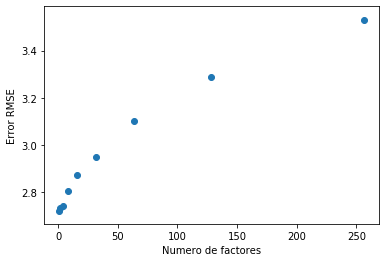

In [59]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [60]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [61]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.7624131369030978
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.002}


In [62]:
rmse_test_means = []
factores = [1,2,4,5,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor, n_epochs=20, lr_all=0.005, reg_all=0.002)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7581  2.6770  2.6824  2.7058  0.0370  
Fit time          0.28    0.27    0.29    0.28    0.01    
Test time         0.05    0.06    0.06    0.06    0.01    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.5720  2.7370  2.8946  2.7345  0.1317  
Fit time          0.29    0.28    0.29    0.29    0.01    
Test time         0.06    0.06    0.05    0.06    0.01    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7686  2.7527  2.6641  2.7285  0.0460  
Fit time          0.31    0.30    0.30    0.30    0.01    
Test time         0.13    0.05    0.06    0.08    0.03    
5
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7851  2.7

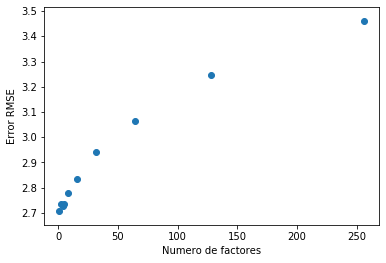

In [63]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

### Con estos parámetros, reentrenaremos un tercer modelo (SVD) y mediremos las recomendaciones:

In [64]:
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']], reader)
trainset, testset = train_test_split(data, test_size=.25)
algo = SVD(n_factors=5, n_epochs=20, lr_all=0.005, reg_all=0.002)
algo.fit(trainset)
predictions = algo.test(testset)

In [65]:
usuario = 76561198011965365
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)

recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [66]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(0, 3)


,user_id,product_id,metascore


In [67]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


In [68]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
28,70,Half-Life,95.266803
631,620,Portal 2,94.895613
95,7670,BioShock™,94.289382
252,22330,The Elder Scrolls IV: Oblivion® Game of the Ye...,93.813895
556,12120,Grand Theft Auto: San Andreas,92.352388
4366,391540,Undertale,91.961992
98,4760,Rome: Total War™ - Collection,91.631535
1672,238010,Deus Ex: Human Revolution - Director's Cut,90.860116
358,22370,Fallout 3: Game of the Year Edition,90.790810
493,8930,Sid Meier's Civilization® V,89.973149


In [69]:
match=pd.DataFrame()
for i in range(0,len(data_reviews[data_reviews.user_id=='76561198011965365'])):
    match=match.append(data_games[data_games.product_id==data_reviews[data_reviews.user_id=='76561198011965365'].product_id.values[i]])
match[['product_id','title','metascore','tags']].head()

,product_id,title,metascore,tags
751,45770,Dead Rising 2: Off the Record,66,"[Action, Zombies, Adventure, Open World, Onlin..."
204,9480,Saints Row 2,72,"[Open World, Action, Sandbox, Character Custom..."
723,63940,Men of War: Vietnam,68,"[Strategy, RTS, War, Tactical, Real Time Tacti..."
31771,17460,Mass Effect,89,"[RPG, Sci-fi, Story Rich, Action, Third-Person..."
31095,105450,Age of Empires® III: Complete Collection,81,"[Strategy, RTS, Base Building, Historical, Mul..."


In [70]:
rmse_svd_3 = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 2.6332
RMSE: 2.6332


2.633224743406698

### Ahora aplicaremos el concepto de Filtro Colaborativo y observaremos la mejora en el performace del modelo

https://pankaj-tiwari2.medium.com/neighborhood-based-collaborative-filtering-in-python-using-surprise-fe9d5700cb58

#### Crearemos un anti_set, que consiste de los pares de usuarios y juegos que no existen en el dataset original. Este es el set en el cual desemos predecir los metascores.

In [71]:
data_final = data_reviews[['user_id', 'product_id', 'metascore']][:100000]
reader = Reader(rating_scale=(1, 100))
# The columns must correspond to user id, item id and metascores (in that order).
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()

#### Lo normal para el antiset es que genere para cada usuario o juego faltante, un metascore promedio correspondiente

In [72]:
games = data_reviews[['product_id' , 'title']].drop_duplicates(['product_id' , 'title'])
users = data_reviews[['user_id' , 'username']].drop_duplicates(['user_id' , 'username'])

#### Usaremos vecinos mas cercanos como cuatro modelo y benchmark:

In [73]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8722
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.7866
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.9562


### Según la referencia que usamos, el RMSE que estamos obteniendo resulta alto. Continuamos generando más modelos y resultados para comparar.

### Entrenaremos un quinto modelo, con otro tipo de KNN

In [74]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions

rmse_knn_1 = best_rmse   
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.8506
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.8921
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0603
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.9673
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.9575
7.850557171201199


### Usando opciones de similitud de coseno en el algoritmo, entrenaremos un sexto modelo. 

https://gist.github.com/pankajti/e631e8f6ce067fc76dfacedd9e4923ca#file-surprise_knn_recommendation-ipynb

In [75]:
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_2 = best_rmse   
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6195
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6369
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6883
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6011
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.5327
4.532699301304516


### Gridsearch KNN

In [76]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

8.141764330492029
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


In [77]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.995622029013415
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


### Usando los parámetros del Gridsearch, entrenaremos un séptimo modelo

In [78]:
# Usar parámetros del gridsearch

sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_3 = best_rmse   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8700
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.1212
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8971
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8920
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8868
2.8700017675338607


### Análisis de predicciones para datos conocidos

In [79]:
pred_df = pd.DataFrame(best_pred).merge(data_reviews , left_on = ['uid', 'iid'], right_on = ['user_id', 'product_id'])
pred_df[['uid', 'iid',  'username', 'user_id', 'title', 'product_id', 'est','metascore']]

,uid,iid,username,user_id,title,product_id,est,metascore
0,76561198090458573,220240,Jimmy,76561198090458573,Far Cry 3,220240,87.671454,88.0
1,76561198368085407,346110,knight,76561198368085407,ARK: Survival Evolved,346110,70.000000,70.0
2,76561198368085407,346110,knight,76561198368085407,ARK: Survival Evolved,346110,70.000000,70.0
3,76561198035874128,394510,Professional Donkey Herder,76561198035874128,HELLDIVERS™,394510,82.418065,83.0
4,76561198209347795,391540,Darkrai491,76561198209347795,Undertale,391540,92.000000,92.0
...,...,...,...,...,...,...,...,...
7524,76561198261182897,24200,AnkhWarrior,76561198261182897,DC Universe™ Online,24200,75.189953,72.0
7525,76561198091353121,306660,LuxCapere,76561198091353121,Ultimate General: Gettysburg,306660,82.215602,84.0
7526,76561198071485803,377160,Huntergorh,76561198071485803,Fallout 4,377160,84.050719,84.0
7527,76561198045522967,220200,xXx_5M0K3Y_83AR_xXx,76561198045522967,Kerbal Space Program,220200,88.000000,88.0


### Análisis de predicciones para datos desconocidos

In [80]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(games , left_on = ['iid'], right_on = ['product_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['user_id'])

In [81]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561198353396844')].head()

,uid,iid,r_ui,est,details,product_id,title,user_id,username
14408751,76561198353396844,271590,81.576704,95.706447,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561198353396844,the_maker988
14408752,76561198353396844,452570,81.576704,81.530390,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561198353396844,the_maker988
14408753,76561198353396844,8880,81.576704,82.982017,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561198353396844,the_maker988
14408754,76561198353396844,61700,81.576704,80.113660,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561198353396844,the_maker988
14408755,76561198353396844,214560,81.576704,88.256217,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561198353396844,the_maker988


In [82]:
pred_df['user_id'].value_counts()

76561198119627604    2582
76561198047898965    2582
76561198097138610    2582
76561198117493111    2582
76561198159119062    2582
                     ... 
76561198010131631    1283
76561198043627942    1283
76561198011965365    1282
76561198010800766    1280
76561197969749884    1238
Name: user_id, Length: 16763, dtype: int64

In [83]:
pred_df['username'].value_counts().unique()

array([9041, 9040, 6459, 6457, 5167, 5166, 5165, 5164, 5163, 3876, 3875,
       3874, 3873, 3872, 2584, 2583, 2582, 2581, 2580, 2579, 1292, 1291,
       1290, 1289, 1288, 1287, 1286, 1285, 1284, 1283, 1282, 1280, 1238],
      dtype=int64)

In [84]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561197990406921')].head()

,uid,iid,r_ui,est,details,product_id,title,user_id,username
169027,76561197990406921,271590,81.576704,95.564573,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561197990406921,MMG Man
169028,76561197990406921,452570,81.576704,81.388516,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561197990406921,MMG Man
169029,76561197990406921,8880,81.576704,82.840143,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561197990406921,MMG Man
169030,76561197990406921,61700,81.576704,79.971786,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561197990406921,MMG Man
169031,76561197990406921,214560,81.576704,88.114343,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561197990406921,MMG Man


In [85]:
#pred_df.to_csv('pred_df 19 12 2020.csv', sep=',')

### Encontrando los vecinos más cercanos de un juego

In [86]:
data_games[data_games.product_id=='440'].head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore


In [87]:
tsr_inner_id = best_algo.trainset.to_inner_iid(440)
tsr_neighbors = best_algo.get_neighbors(tsr_inner_id, k=4)
games[games.product_id.isin([algo.trainset.to_raw_iid(inner_id)
                       for inner_id in tsr_neighbors])]

,product_id,title
28985,346110,ARK: Survival Evolved
33756,394510,HELLDIVERS™
35557,232090,Killing Floor 2
41891,391540,Undertale


In [88]:
data_reviews.nlargest(3, 'metascore')

,username,hours,product_id,user_id,genres,title,price,metascore
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
17,philmont,111.7,271590,76561197977483812,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
32,Moebius Teras,35.5,271590,76561198020718137,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


### Comparar resultados de SVD con KNN, de forma gráfica

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

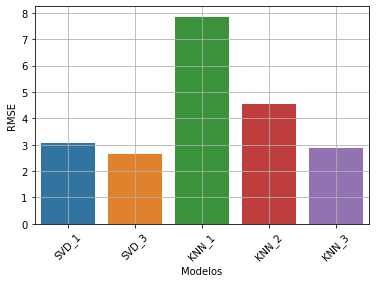

In [89]:
errores = {
    'Modelos': ['SVD_1', 'SVD_3', 'KNN_1', 'KNN_2', 'KNN_3'],
    
    'RMSE': [rmse_svd_1, rmse_svd_3, rmse_knn_1, 
             rmse_knn_2, rmse_knn_3]}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'RMSE'])

sns.barplot(x = 'Modelos', y = 'RMSE', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

### Concluimos que el modelo mas performante fue el siguiente:

sim_options = {'name': 'cosine' ,'user_based':  False}

KNNBaseline con k =3 

### ¿como ir más allá del metascore en los features del modelo? ¿como usar las horas jugadas y el tag/género? 


#### R: Filtrar primero el dataset por género/etiqueta, entrenando el modelo con esos datos y luego arrojando una predicción

In [90]:
data_reviews.genres.value_counts().index[0]

['Action']

In [93]:
data_reviews_action = data_reviews.copy()
data_reviews_action.genres = data_reviews_action.genres.astype(str)
data_reviews_action = data_reviews_action[data_reviews_action.genres=="['Action']"]
data_reviews_action.head()

"['Action']"

In [96]:
data_final = data_reviews_action[['user_id', 'product_id', 'metascore']]
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()

sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_4 = best_rmse   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.1174
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.2920
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.2511
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.5408
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.4554
2.540763473231786


<font color=blue>

### Comentar sobre la predicción final vs la expectativa. Cuantificar la expectativa

#### Predecir recomendaciones mediante rating sirve para casos muy particulares y no es funcional todo el tiempo. Por ejemplo, si abro por primera vez una web de Ecommerce espero ver los productos mejor calificados, pero luego de filtrar de forma manual o buscar de forma repetitiva en la misma web, espero ver que las recomendaciones cada vez más se ajusten a mis parámetros de búsqueda.

#### Por lo cual, si bien tenía una expectativa de generar recomendaciones con datasets de comportamiento de búsqueda, en realidad solo podemos hacer recomendaciones basadas en los productos de mejor rating.

#### Finalmente, creo que quizá sea necesario balancear el hecho que algunos usuarios aportan más datos que otros (califican más juegos, generan mas horas y metascore) mediante la sustracción del metascore medio del usuario de todas las calificaciones del mismo

<font color=blue>

### Crear una propuesta a probar luego sobre estos datos para la próxima entrega

#### Usar el texto de dejó el usuario al calificar, para mejorar el sistema de recomendación, usado librerías de procesamiento de lenguaje natural.

#### Evitar el metascore y generar una métrica numérica de rating de cada review a partir del texto de la calificación.